In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 4.3 MB/s 


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import cv2
import os
import pickle
import joblib
import matplotlib.pyplot as plt
import pandas as pd


#Preprocessing 

In [ ]:
dir='/content/drive/MyDrive/Major project/e commerce image classsification/image classification/'   #my dataset available in repository you can add more as per requirement.
filenames = os.listdir(dir)

the code below is for seperating classes for different types of ojects present

In [ ]:


# classes=[]
# i=0
# my=[]

# print(filenames)
# for filename in filenames:
#   i=i+1
#   my.append(filename)
  
#   c= filename.split(" ")[0] #taking out 1st character of our dataset to represent them in classes 
    
#   if c=='clothes':
#     classes.append(0)

#   elif c=='laptop':

#     classes.append(1)


#   elif c=='shoes':
#     classes.append(2)


#   elif c=='watch':
#     classes.append(3)
    
   
  
  


# print(classes) 
# print(f"total num of items is {i}  " )


# print(my)




In [ ]:
# # import pandas as pd

# df = pd.DataFrame({"filename": my, "category": classes})

# df["category"] = df["category"].replace({0: "clothes", 1: "laptop",2:"shoes",3:"watch"})
# df["category"] = df["category"].replace({0: "digit_0", 1: "digit_1", 2:"digit_2",3:"digit_3",4:"digit_4",5: "digit_5", 6: "digit_6", 7:"digit_7",8:"digit_8",9:"digit_9"})

converting our dataframe object to csv for direct loading in future 

In [ ]:
# df.to_csv('/content/drive/MyDrive/Major project/Datasets/Shoes_clothes_classification.csv',index=False)

below is code after importing csv file.

#actual code begins

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Major project/Datasets/Shoes_clothes_classification.csv")
df["category"] = df["category"].replace({"clothes": "clothes: class 0", "laptop": "laptop: class 1", "shoes":"shoes: class 2","watch":"watch: class 3"})
df.head()

,filename,category
0,laptop (1162).jpg,laptop: class 1
1,laptop (1560).jpg,laptop: class 1
2,laptop (1488).jpg,laptop: class 1
3,laptop (985).jpg,laptop: class 1
4,laptop (1153).jpg,laptop: class 1


In [ ]:
df.category.value_counts()

clothes: class 0    2195
laptop: class 1     1984
shoes: class 2      1940
watch: class 3      1838
Name: category, dtype: int64

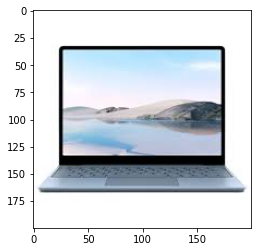

In [ ]:
import random
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

sample1 = random.choice(filenames)
image1 = load_img(dir + "/" + sample1)
plt.imshow(image1)

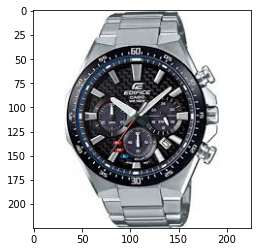

In [ ]:
sample2 = random.choice(filenames)
image2 = load_img(dir + "/" + sample2)
plt.imshow(image2)


In [ ]:
image2.size, image1.size

((225, 225), (200, 200))

In [ ]:
IMAGE_WIDTH = 60
IMAGE_HEIGHT = 80
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
INPUT_SHAPE = (IMAGE_WIDTH, IMAGE_HEIGHT, 1)

In [ ]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=INPUT_SHAPE))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation="softmax"))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=tensorflow.keras.optimizers.Adadelta(),
    metrics=["accuracy"],
)

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1.0 / 255,
    shear_range=0.1,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

In [ ]:
BATCH_SIZE = 16
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    dir,
    x_col="filename",
    y_col="category",
    target_size=IMAGE_SIZE,
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
)

Found 6361 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 4 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1.0 / 255,
    shear_range=0.1,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

In [ ]:
BATCH_SIZE = 16
test_generator = train_datagen.flow_from_dataframe(
    test_df,
    dir,
    x_col="filename",
    y_col="category",
    target_size=IMAGE_SIZE,
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
)

Found 1590 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
example_df = train_df.sample(n=1)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    dir,
    x_col="filename",
    y_col="category",
    target_size=IMAGE_SIZE,
    class_mode="categorical",
    color_mode="grayscale",
)

Found 1 validated image filenames belonging to 1 classes.


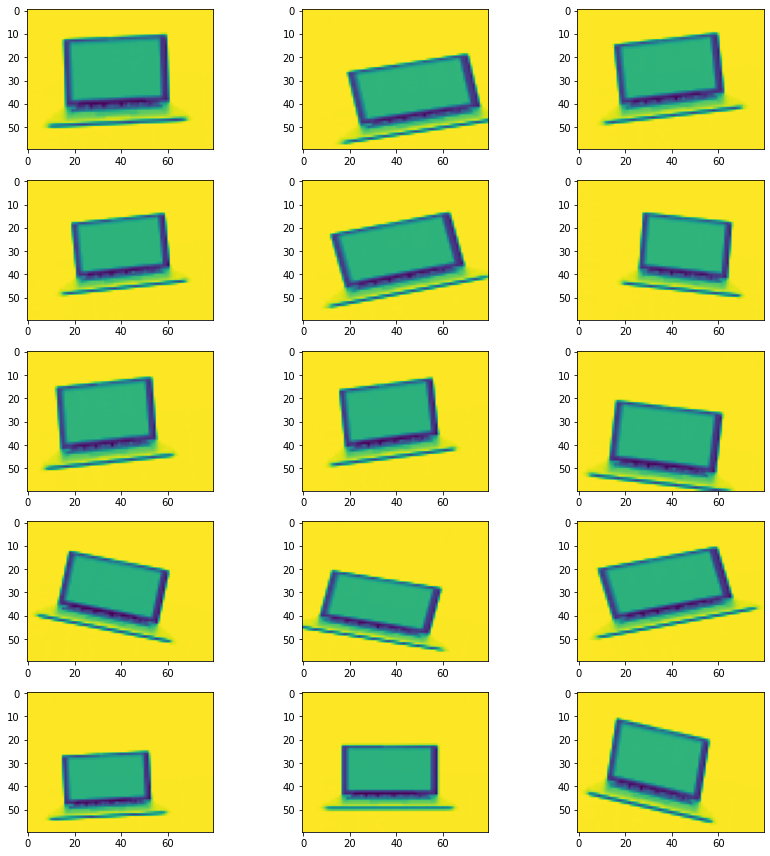

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i + 1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        image = image.reshape(IMAGE_SIZE)
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
# img_size=50
# data=[]
# for c in category:
#   folder=os.path.join(dir,c)
#   label=category.index(c)
#   for img in os.listdir(folder):
#     img_path=os.path.join(folder,img)
#     img_arr=cv2.imread(img_path)
#     img_arr=cv2.resize(img_arr,(img_size,img_size))
    # data.append([img_arr, label])
    
    

In [ ]:
import time
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# save_model_name = 'vgg19_transfer_subcat.h5'
save_model_name = 'shoe_clothes_classification.h5'
filepath = '/content/drive/MyDrive/Colab Notebooks/'
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
best_model = ModelCheckpoint(filepath+save_model_name, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_delta=1e-4, mode='min')


In [ ]:
# this is just sample for how the code works increase numberof dataset and training epochs for actual project.

start = time.time()
EPOCHS =11   #increase num of epoch for better result 
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=test_df.shape[0] // BATCH_SIZE,
    steps_per_epoch=30,
    # steps_per_epoch=train_df.shape[0] // BATCH_SIZE,
    callbacks=[earlyStopping, best_model, reduce_lr_loss]
)

elapsed = time.time() - start
print('Computation time = ' + str(round(elapsed,2)) + 's')

np.save('shoes_clothes_history.npy',history.history)

Epoch 1/11
20/30 [===================>..........] - ETA: 1:48 - loss: 1.3856 - accuracy: 0.2469

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 1384s 46s/step - loss: 1.3803 - accuracy: 0.2708 - val_loss: 1.3716 - val_accuracy: 0.2702

Epoch 00001: val_accuracy improved from -inf to 0.27020, saving model to /content/drive/MyDrive/Colab Notebooks/shoe_clothes_classification.h5
Epoch 2/11
30/30 [==============================] - 371s 12s/step - loss: 1.3831 - accuracy: 0.2333 - val_loss: 1.3645 - val_accuracy: 0.2727

Epoch 00002: val_accuracy improved from 0.27020 to 0.27273, saving model to /content/drive/MyDrive/Colab Notebooks/shoe_clothes_classification.h5
Epoch 3/11
30/30 [==============================] - 345s 12s/step - loss: 1.3766 - accuracy: 0.2479 - val_loss: 1.3587 - val_accuracy: 0.2601

Epoch 00003: val_accuracy did not improve from 0.27273
Epoch 4/11
30/30 [==============================] - 346s 12s/step - loss: 1.3679 - accuracy: 0.2646 - val_loss: 1.3551 - val_accuracy: 0.2551

Epoch 00004: val_accuracy did not improve from 0.27273
Epoch 5/11
30/30 [=====================

In [ ]:
NUM_SAMPLES = 40
sample_test_df = test_df.sample(NUM_SAMPLES).reset_index(drop=True)
sample_test_datagen = ImageDataGenerator(rescale=1.0 / 255)
sample_test_generator = sample_test_datagen.flow_from_dataframe(
    sample_test_df,
    dir,
    x_col="filename",
    y_col="category",
    target_size=IMAGE_SIZE,
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
)




Found 40 validated image filenames belonging to 4 classes.


In [ ]:
import numpy as np
predict = model.predict(sample_test_generator)
print(predict)

predictions = np.argmax(predict, axis=-1)
print(predictions)



[[0.26128203 0.2622909  0.2561827  0.22024444]
 [0.19626991 0.27871385 0.3242224  0.20079388]
 [0.1992361  0.2704558  0.32032397 0.20998411]
 [0.19392021 0.27791277 0.3263478  0.20181917]
 [0.21393363 0.26289842 0.29231998 0.23084803]
 [0.19931251 0.2738023  0.2933902  0.23349503]
 [0.19899331 0.27946082 0.3137729  0.207773  ]
 [0.247239   0.25872338 0.25934267 0.23469496]
 [0.18842396 0.27783933 0.33586934 0.19786744]
 [0.23042686 0.26527438 0.2786721  0.22562665]
 [0.19742654 0.2776191  0.32025576 0.20469858]
 [0.19476558 0.27315855 0.32034793 0.21172796]
 [0.18687803 0.26920846 0.328358   0.21555552]
 [0.17720181 0.27370018 0.3437558  0.20534217]
 [0.20039698 0.28864413 0.31102708 0.19993183]
 [0.19529074 0.27334672 0.30149007 0.22987244]
 [0.19639052 0.27654952 0.32921594 0.19784401]
 [0.20845123 0.2779663  0.29428208 0.21930037]
 [0.1980052  0.2764589  0.3130232  0.21251275]
 [0.19829813 0.2740806  0.29373068 0.23389058]
 [0.17625247 0.27810395 0.35048667 0.19515695]
 [0.18847719 

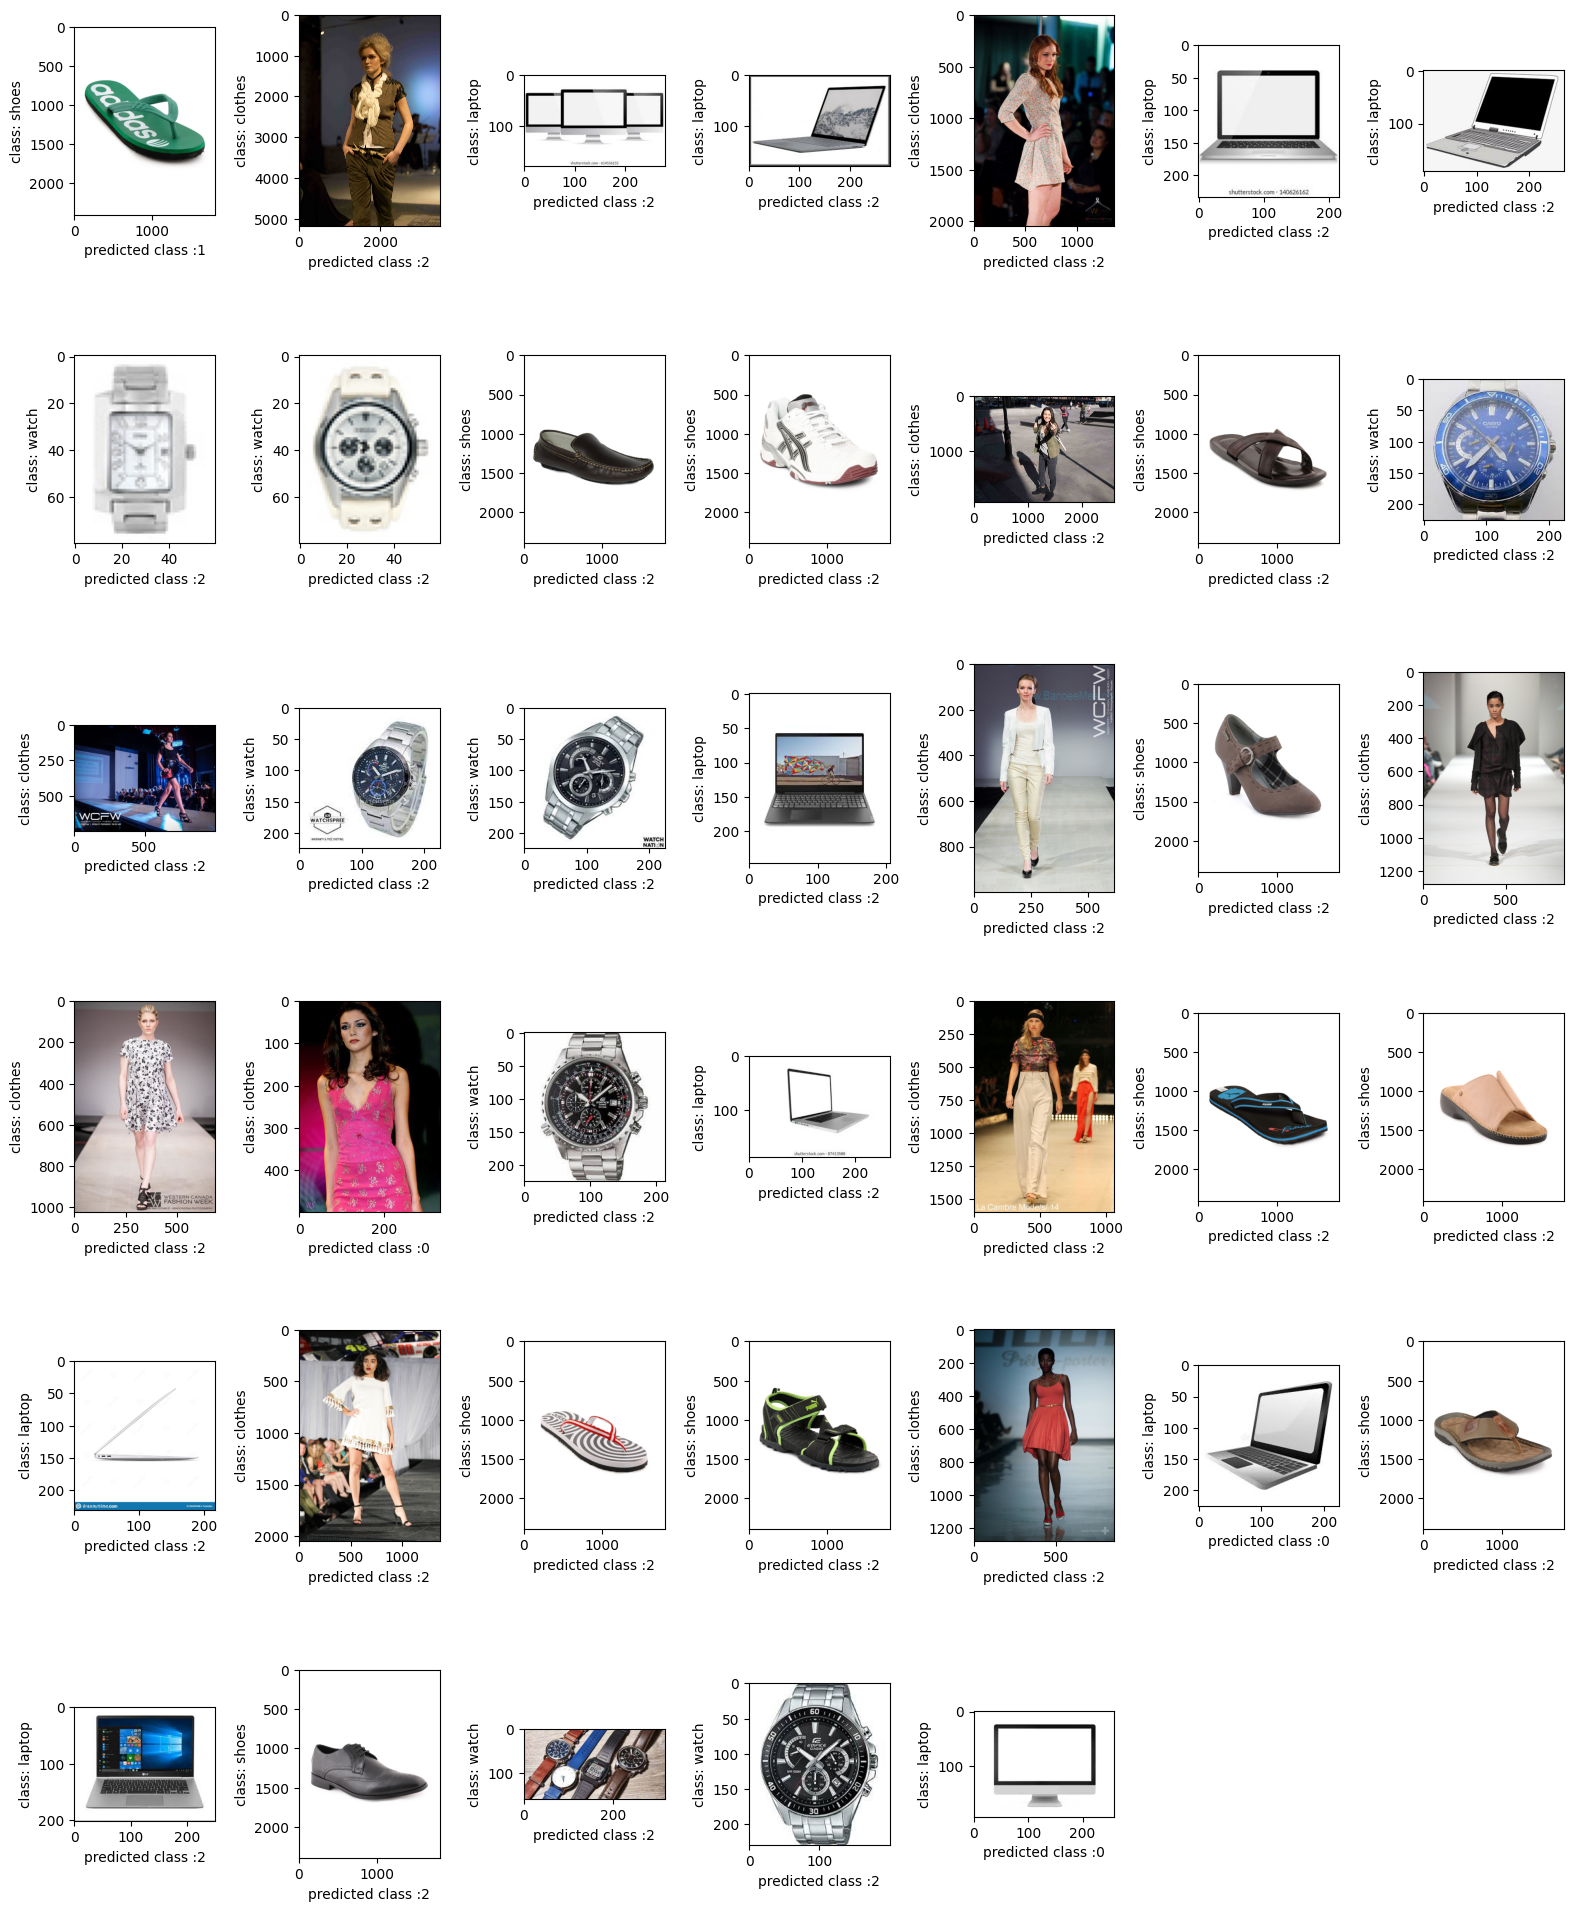

 clothes:class 0   laptop: class 1  shoes : class 2  watch :class 3


In [ ]:
plt.figure(figsize=(16,20),dpi=99)

plt. title(" clothes:class 0   laptop: class 1  shoes : class 2  watch :class 3")
for index, row in sample_test_df.iterrows():
    
    filename = row["filename"]
    category=row["category"]
    prediction = predictions[index]

    img = load_img(dir + "/" + filename)
    plt.subplot(6, 7, index + 1)
    plt.imshow(img)
    plt.ylabel("class: "+category)
    plt.xlabel("predicted class :"+str(prediction))
plt.tight_layout()
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


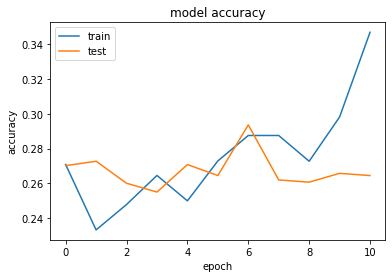

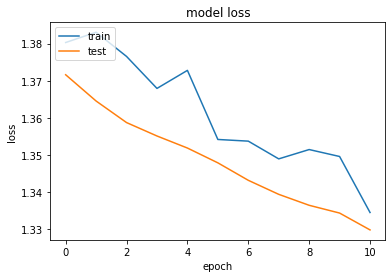

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# calculate the prediction class result
import math

def pred_class(input_probs):
  class_top1 = []
  index_top1 = np.argmax(input_probs, axis = 1)
  class_top1 = (index_top1 + 1)
  return class_top1

def acc_cal(pred, truth):
  accuracy_class = int((pred == truth).sum())/ int(len(truth))
  return accuracy_class

def truth_labels(generator, batch_size):
    number_of_examples = len(generator.filenames)
    number_of_generator_calls = math.ceil(number_of_examples / (1.0 * batch_size))
    labels_list = []
    for i in range(0,int(number_of_generator_calls)):
        labels_list.extend(np.array(generator[i][1]))
    return labels_list

In [ ]:
# actual results instead of multiple class prediction # test_pred - test_labels - test_pred - test_labels 
test_labels = truth_labels(test_generator, BATCH_SIZE)

test_top1 = pred_class(test_pred)
y_test_truth = pred_class(test_labels)
acc_test = acc_cal(test_top1, y_test_truth)

print('Test accuracy and prediction')
print(test_top1.shape, y_test_truth.shape, acc_test)

import random
mask = random.sample(range(0, 40), 24)
print(test_top1[mask])
print(y_test_truth[mask])

Test accuracy and prediction
(1590,) (1590,) 0.2440251572327044
[3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2]
[3 2 2 3 2 2 4 1 2 4 3 4 1 1 1 2 3 2 3 3 3 4 1 2]


In [ ]:
# confusion matrix for multiclass prediction results
# del test_pred, test_true
test_pred = model.predict(test_generator)
test_true = truth_labels(test_generator, BATCH_SIZE)
classes = test_generator.class_indices
test_pred_top1 = pred_class(test_pred)
test_true_top1 = pred_class(test_true)
acc_test = acc_cal(test_pred_top1, test_true_top1)
print('Test accuracy = ',acc_test)

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_true_top1, test_pred_top1)
print('Confusion matrix for test dataset')
print(cnf_matrix)

Test accuracy =  0.2522012578616352
Confusion matrix for test dataset
[[  4  34 389   0]
 [  6  33 383   0]
 [  3  23 364   0]
 [  8  19 324   0]]


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.72)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix


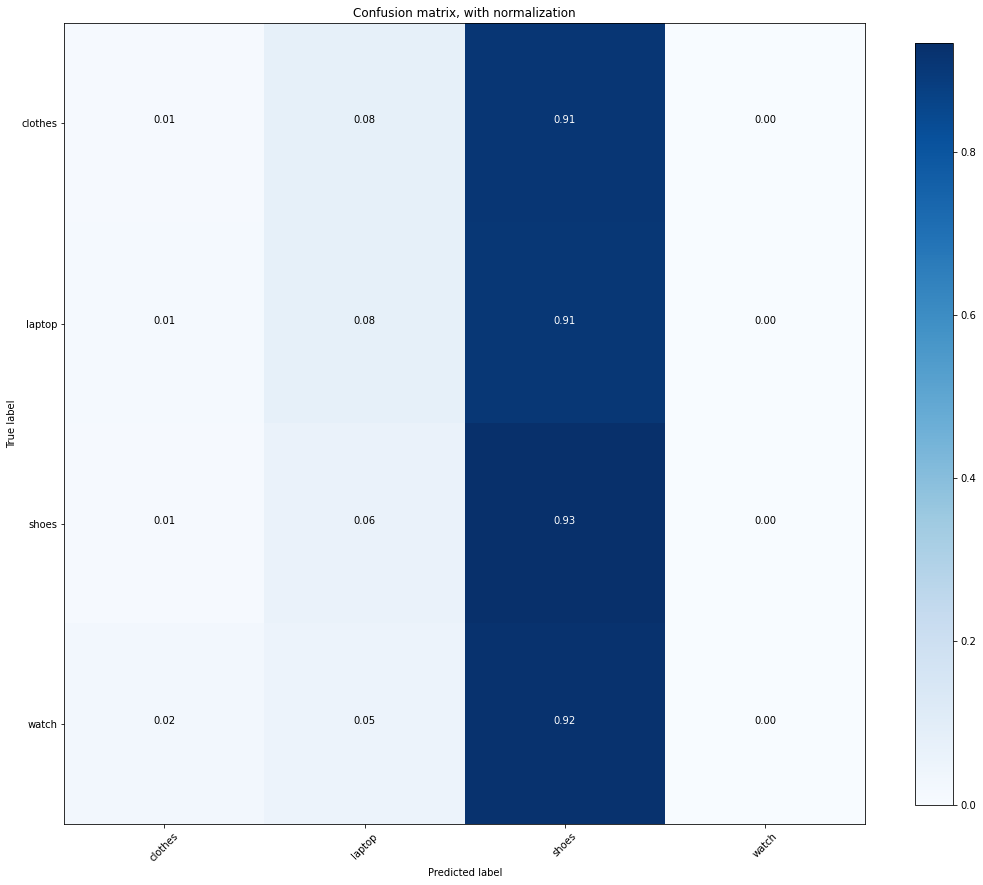

In [ ]:
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=classes,normalize=True,
                      title='Confusion matrix, with normalization')

Confusion matrix, without normalization


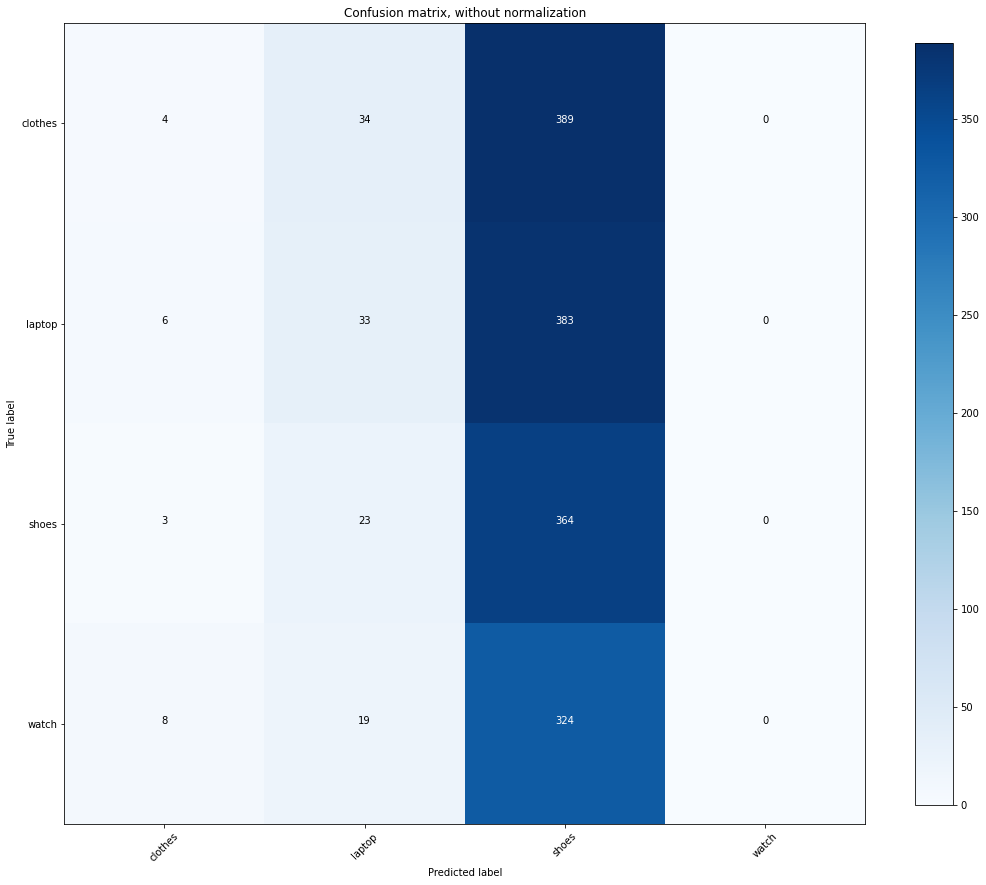

In [ ]:
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=classes,normalize=False,
                      title='Confusion matrix, without normalization')